In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
f=open('data/application_train.csv')
app_train = pd.read_csv(f)

In [36]:
app_train.groupby("CNT_CHILDREN").size()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
dtype: int64

In [38]:
max0=app_train['CNT_CHILDREN'].max()

In [53]:
app_train['CNT_CHILDREN_GROUP'] =pd.cut(app_train['CNT_CHILDREN'].values,[-1,0,2,5,max0],include_lowest=False )

In [122]:
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-1, 0]    215371
(0, 2]      87868
(2, 5]       4230
(5, 19]        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [117]:
grp='CNT_CHILDREN_GROUP:' + app_train['CNT_CHILDREN_GROUP'].astype(str)+ ',TARGET:' + app_train['TARGET'].astype(str)
grp

0         CNT_CHILDREN_GROUP:(-1, 0],TARGET:1
1         CNT_CHILDREN_GROUP:(-1, 0],TARGET:0
2         CNT_CHILDREN_GROUP:(-1, 0],TARGET:0
3         CNT_CHILDREN_GROUP:(-1, 0],TARGET:0
4         CNT_CHILDREN_GROUP:(-1, 0],TARGET:0
5         CNT_CHILDREN_GROUP:(-1, 0],TARGET:0
6          CNT_CHILDREN_GROUP:(0, 2],TARGET:0
7         CNT_CHILDREN_GROUP:(-1, 0],TARGET:0
8         CNT_CHILDREN_GROUP:(-1, 0],TARGET:0
9         CNT_CHILDREN_GROUP:(-1, 0],TARGET:0
10         CNT_CHILDREN_GROUP:(0, 2],TARGET:0
11        CNT_CHILDREN_GROUP:(-1, 0],TARGET:0
12        CNT_CHILDREN_GROUP:(-1, 0],TARGET:0
13         CNT_CHILDREN_GROUP:(0, 2],TARGET:0
14        CNT_CHILDREN_GROUP:(-1, 0],TARGET:0
15        CNT_CHILDREN_GROUP:(-1, 0],TARGET:0
16        CNT_CHILDREN_GROUP:(-1, 0],TARGET:0
17         CNT_CHILDREN_GROUP:(0, 2],TARGET:0
18        CNT_CHILDREN_GROUP:(-1, 0],TARGET:0
19         CNT_CHILDREN_GROUP:(0, 2],TARGET:0
20        CNT_CHILDREN_GROUP:(-1, 0],TARGET:0
21         CNT_CHILDREN_GROUP:(0, 

In [69]:
grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']

In [124]:
grouped_df.describe()

,count,mean,std,min,25%,50%,75%,max
"CNT_CHILDREN_GROUP:(-1, 0],TARGET:0",198762.0,166747.010980,1.061799e+05,25650.0,112500.0,144000.0,202500.0,13500000.0
"CNT_CHILDREN_GROUP:(-1, 0],TARGET:1",16609.0,160804.210548,8.483011e+04,25650.0,112500.0,135000.0,202500.0,1890000.0
"CNT_CHILDREN_GROUP:(0, 2],TARGET:0",80081.0,174590.584401,1.201981e+05,26550.0,112500.0,157500.0,211500.0,18000090.0
"CNT_CHILDREN_GROUP:(0, 2],TARGET:1",7787.0,176115.362720,1.327159e+06,27900.0,112500.0,135000.0,202500.0,117000000.0
"CNT_CHILDREN_GROUP:(2, 5],TARGET:0",3810.0,175053.742913,1.128427e+05,29250.0,112500.0,157500.0,202500.0,2250000.0
"CNT_CHILDREN_GROUP:(2, 5],TARGET:1",420.0,160677.385714,1.130315e+05,36000.0,96750.0,135000.0,185625.0,1350000.0
"CNT_CHILDREN_GROUP:(5, 19],TARGET:0",33.0,139159.090909,7.112483e+04,45000.0,90000.0,112500.0,180000.0,337500.0
"CNT_CHILDREN_GROUP:(5, 19],TARGET:1",9.0,180000.000000,7.377118e+04,90000.0,135000.0,180000.0,202500.0,315000.0


0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

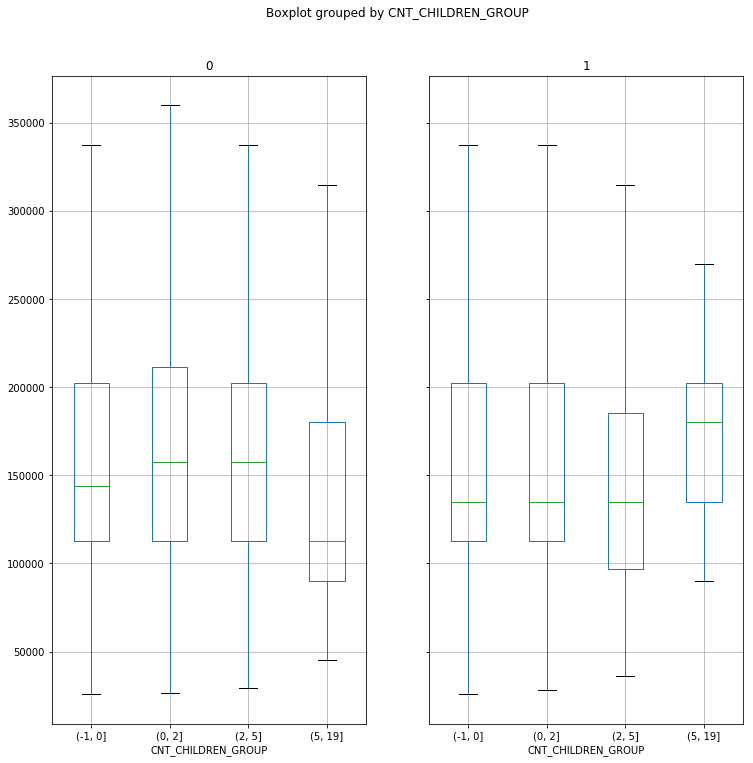

In [112]:
plt_column = 'AMT_INCOME_TOTAL'
plt_by = 'CNT_CHILDREN_GROUP'

app_train.groupby('TARGET').boxplot(column=plt_column,  by = plt_by, showfliers = False, figsize=(12,12))
#app_train.groupby('TARGET').boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))

In [130]:
tmp=grouped_df.apply(lambda x: (x - np.mean(x) ) / ( np.std(x) ))
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']=tmp
app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491536
1,270000.0,0.972437
2,67500.0,-0.934708
3,135000.0,-0.298993
4,121500.0,-0.426136


In [134]:
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']

0         0.491536
1         0.972437
2        -0.934708
3        -0.298993
4        -0.426136
5        -0.638041
6        -0.029872
7         1.820057
8        -0.510898
9        -0.298993
10       -0.516572
11       -1.208592
12       -0.934708
13        0.419389
14        0.209579
15       -0.087088
16       -0.553279
17       -0.778641
18       -0.510898
19       -0.703764
20       -0.298993
21        0.232197
22        2.291309
23       -0.786375
24       -0.329380
25       -0.722803
26       -0.569440
27       -0.516572
28        0.972437
29       -0.722803
            ...   
307481    0.756780
307482    0.548627
307483   -0.638041
307484    3.515297
307485    0.793773
307486    0.980965
307487   -0.468517
307488   -0.087088
307489    0.756780
307490   -0.807565
307491   -0.703764
307492    3.939107
307493   -0.298993
307494    0.793773
307495    0.124817
307496    1.820057
307497    0.124817
307498    0.294341
307499   -0.807565
307500    0.887675
307501   -0.833604
307502   -0.